##Etude statistique

Nombre d'images

In [ ]:
import os
from os.path import join, isfile

def nombre_images(folder_path):
    # Liste des fichiers dans le dossier
    files = [f for f in os.listdir(folder_path) if isfile(join(folder_path, f))]

    # Compter le nombre d'images
    image_count = sum(1 for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tif', '.tiff')))

    return image_count

if __name__ == "__main__":
    # Spécifier le chemin du dossier contenant les images
    folder_path = "/content/drive/MyDrive/Images"

    # Appeler la fonction pour compter le nombre d'images dans le dossier
    count = nombre_images(folder_path)

    print(f"Nombre d'images est: {count}")


Nombre d'images est 652


Nombre d'annotations

In [ ]:
import os
from os.path import join, isfile

def nombre_fichiers(folder_path):
    # Liste des fichiers dans le dossier
    files = [f for f in os.listdir(folder_path) if isfile(join(folder_path, f))]

    # Compter le nombre de fichiers
    file_count = sum(1 for file in files if file.lower().endswith(('.txt')))

    return file_count

if __name__ == "__main__":
    # Spécifier le chemin du dossier contenant les fichiers
    folder_path = "/content/drive/MyDrive/Annotations"

    # Appeler la fonction pour compter le nombre de fichiers dans le dossier
    count = nombre_fichiers(folder_path)

    print(f"Nombre de fichiers d'annotation: {count}")


Nombre de fichiers d'annotation: 663


Enlever les fichiers d'annotation doublants

In [ ]:
import os
from collections import defaultdict

# Chemin vers le dossier d'annotations
annotations_path = "/content/drive/MyDrive/Annotations"

# Lister tous les fichiers d'annotations
annotation_files = [f for f in os.listdir(annotations_path) if f.endswith(".txt")]

# Utiliser un dictionnaire pour stocker les fichiers en fonction de leur contenu
files_by_content = defaultdict(list)

# Identifier les doublons
for annotation_file in annotation_files:
    with open(os.path.join(annotations_path, annotation_file), 'r') as file:
        content = file.read()
        files_by_content[content].append(annotation_file)

# Supprimer les doublons
for content, file_list in files_by_content.items():
    if len(file_list) > 1:
        for duplicate_file in file_list[1:]:
            duplicate_path = os.path.join(annotations_path, duplicate_file)
            os.remove(duplicate_path)

print("Opération terminée.")
# Appeler la fonction pour compter le nombre de fichiers dans le dossier
count = nombre_fichiers(annotations_path)

print(f"Nombre de fichiers d'annotation aprés suppression des doublants: {count}")

Opération terminée.
Nombre de fichiers d'annotation aprés suppression des doublants: 653


Nombre d'occurences des classes des oraganes végétaux

In [1]:
import os
import pandas as pd

def collect_stats(annotations_folder):
    class_stats = {}

    for filename in os.listdir(annotations_folder):
        if filename.endswith(".txt"):
            file_path = os.path.join(annotations_folder, filename)

            with open(file_path, "r") as file:
                lines = file.readlines()

            for line in lines:
                parts = line.split()
                class_name = parts[0]

                if class_name not in class_stats:
                    class_stats[class_name] = 1
                else:
                    class_stats[class_name] += 1

    return class_stats

# Chemins vers les trois dossiers d'annotations
annotations_folder1 = "/content/drive/MyDrive/Annotations"
annotations_folder2 = "/content/drive/MyDrive/Images/train/labels"
annotations_folder3 = "/content/drive/MyDrive/Images/test/labels"

# Collecter les statistiques pour chaque dossier d'annotations
class_stats1 = collect_stats(annotations_folder2)
class_stats2 = collect_stats(annotations_folder3)
class_stats3 = collect_stats(annotations_folder1)

# Convertir les dictionnaires en DataFrames pandas
df1 = pd.DataFrame(list(class_stats1.items()), columns=['Classe', 'Training Subset'])
df2 = pd.DataFrame(list(class_stats2.items()), columns=['Classe', 'Test Subset'])
df3 = pd.DataFrame(list(class_stats3.items()), columns=['Classe', 'Complete dataset'])

# Fusionner les DataFrames en utilisant la colonne 'Classe' comme clé
merged_df = pd.merge(df1, df2, on='Classe', how='outer')
merged_df = pd.merge(merged_df, df3, on='Classe', how='outer')

# Remplacer les valeurs NaN par 0 et afficher le tableau
df = merged_df.fillna(0)
df.style.set_properties(**{"border": "2px solid blue", "color": "black"})


,Classe,Training Subset,Test Subset,Complete dataset
0,fruit,1113,230,1343
1,leaf,8431,1506,9937
2,stem,3659,625,4284
3,flower,3294,648,3942
4,root,112,26,138
5,seed,4,6,10


Statistiques descriptives sur la longueur et la largeur des images



In [ ]:
from PIL import Image
import os
import pandas as pd

# Chemin vers le dossier contenant les images
images_folder = "/content/drive/MyDrive/Images"

# Initialiser une liste pour stocker les données sur la longueur et la largeur
data = []

# Parcourir tous les fichiers dans le dossier d'images
for filename in os.listdir(images_folder):
    if filename.endswith((".jpg", ".jpeg", ".png", ".bmp")):
        image_path = os.path.join(images_folder, filename)

        # Ouvrir l'image et obtenir ses dimensions
        with Image.open(image_path) as img:
            width, height = img.size

        # Ajouter les données à la liste
        data.append({
            'Image': filename,
            'Longueur': width,
            'Largeur': height
        })

# Convertir la liste en un DataFrame pandas
df = pd.DataFrame(data)

# Afficher des statistiques descriptives
print("Statistiques descriptives sur la longueur et la largeur des images :")
print(df.describe())

# Afficher une moyenne générale
print("\nMoyenne générale :")
print(df[['Longueur', 'Largeur']].mean())


Statistiques descriptives sur la longueur et la largeur des images :
          Longueur      Largeur
count   652.000000   652.000000
mean   3364.455521  5164.642638
std     334.093017   468.225095
min     960.000000  1280.000000
25%    3278.000000  5089.750000
50%    3304.500000  5149.000000
75%    3334.000000  5170.000000
max    4912.000000  7360.000000

Moyenne générale :
Longueur    3364.455521
Largeur     5164.642638
dtype: float64


Statistiques descriptives sur la longueur et la largeur des classes

In [ ]:
import os
import pandas as pd

# Chemin vers le dossier contenant les fichiers d'annotations YOLO
annotations_folder = "/content/drive/MyDrive/Annotations"

# Initialiser une liste pour stocker les données sur la longueur et la largeur
data = []

# Parcourir tous les fichiers dans le dossier d'annotations
for filename in os.listdir(annotations_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(annotations_folder, filename)

        # Ouvrir le fichier d'annotations
        with open(file_path, "r") as file:
            lines = file.readlines()

        # Parcourir chaque ligne du fichier d'annotations
        for line in lines:
            # Diviser la ligne en mots
            parts = line.split()

            # La première partie est la classe
            class_name = parts[0]

            # Les coordonnées suivantes sont x, y, largeur, hauteur
            x, y, width, height = map(float, parts[1:5])

            # Ajouter les données à la liste
            data.append({
                'Classe': class_name,
                'Longueur': width,
                'Largeur': height
            })

# Convertir la liste en un DataFrame pandas
df = pd.DataFrame(data)
# Afficher des statistiques descriptives
print("Statistiques descriptives sur la longueur et la largeur des classes :")
print(df.groupby('Classe').describe())

# Afficher une moyenne générale
print("\nMoyenne générale :")
print(df[['Longueur', 'Largeur']].mean())

Statistiques descriptives sur la longueur et la largeur :
       Longueur                                                            \
          count      mean       std      min       25%      50%       75%   
Classe                                                                      
flower   3942.0  0.051862  0.042715  0.00625  0.028750  0.04250  0.062500   
fruit    1343.0  0.064753  0.062579  0.00750  0.032500  0.04750  0.072500   
leaf     9937.0  0.127654  0.093901  0.01000  0.060000  0.10125  0.168750   
root      138.0  0.184493  0.125741  0.02000  0.099375  0.14125  0.251563   
seed       10.0  0.057250  0.025033  0.02500  0.036562  0.05625  0.069687   
stem     4284.0  0.090160  0.081647  0.00500  0.037500  0.06375  0.112500   

                Largeur                                                    \
            max   count      mean       std       min       25%       50%   
Classe                                                                      
flower  0.67750  

Nombre de bounding boxes annotées pour chaque organe dans les deux ensemble Train et Test

Nombre total d'images d'entraînement : 522
Nombre total d'annotations d'entraînement : 16613
Moyenne d'annotations par image d'entraînement : 31.825670498084293
Nombre total d'images de test : 130
Nombre total d'annotations de test : 3284
Moyenne d'annotations par image de test : 25.26153846153846


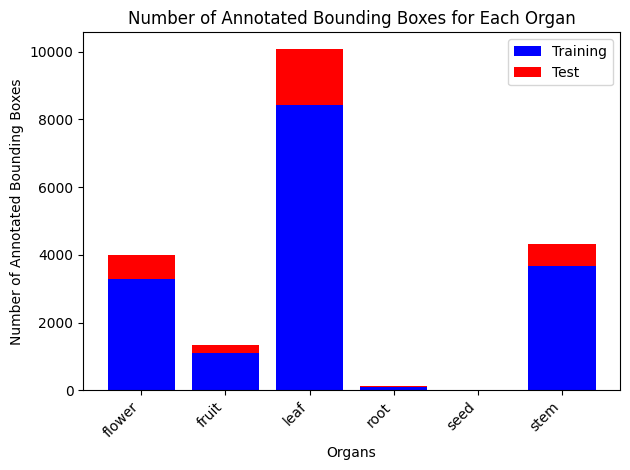

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_annotations(annotation_path):
    with open(annotation_path, 'r') as file:
        annotations = file.readlines()
    return annotations

def load_images(images_path):
    images_files = [f for f in os.listdir(images_path) if f.endswith((".jpg", ".png"))]
    images = [cv2.imread(os.path.join(images_path, img)) for img in images_files]
    return images

def extract_class_from_annotation(annotation_line):
    class_id = annotation_line.split()[0]
    return class_id

# Chemins vers les dossiers
train_annotations_path = "/content/drive/MyDrive/Images/train/labels"
train_images_path = "/content/drive/MyDrive/Images/train/images"

test_annotations_path = "/content/drive/MyDrive/Images/test/labels"
test_images_path = "/content/drive/MyDrive/Images/test/images"
# Charger les annotations et les images d'entraînement
train_annotations_files = [os.path.join(train_annotations_path, f) for f in os.listdir(train_annotations_path) if f.endswith(".txt")]
train_images = load_images(train_images_path)

# Charger les annotations et les images de test
test_annotations_files = [os.path.join(test_annotations_path, f) for f in os.listdir(test_annotations_path) if f.endswith(".txt")]
test_images = load_images(test_images_path)

# Statistiques de base pour les ensembles d'entraînement
num_train_images = len(train_images)
num_train_annotations = sum([len(load_annotations(f)) for f in train_annotations_files])
average_annotations_per_train_image = num_train_annotations / num_train_images

print(f"Nombre total d'images d'entraînement : {num_train_images}")
print(f"Nombre total d'annotations d'entraînement : {num_train_annotations}")
print(f"Moyenne d'annotations par image d'entraînement : {average_annotations_per_train_image}")

# Statistiques de base pour les ensembles de test
num_test_images = len(test_images)
num_test_annotations = sum([len(load_annotations(f)) for f in test_annotations_files])
average_annotations_per_test_image = num_test_annotations / num_test_images

print(f"Nombre total d'images de test : {num_test_images}")
print(f"Nombre total d'annotations de test : {num_test_annotations}")
print(f"Moyenne d'annotations par image de test : {average_annotations_per_test_image}")

# Visualisation des classes pour les ensembles d'entraînement
all_train_classes = []
for annotation_file in train_annotations_files:
    annotations = load_annotations(annotation_file)
    classes = [extract_class_from_annotation(line) for line in annotations]
    all_train_classes.extend(classes)

unique_train_classes, train_class_counts = np.unique(all_train_classes, return_counts=True)

# Visualisation des classes pour les ensembles de test
all_test_classes = []
for annotation_file in test_annotations_files:
    annotations = load_annotations(annotation_file)
    classes = [extract_class_from_annotation(line) for line in annotations]
    all_test_classes.extend(classes)

unique_test_classes, test_class_counts = np.unique(all_test_classes, return_counts=True)

# Create the figure and axes
fig, ax = plt.subplots()

# Create two sets of bars for training and test data
ax.bar(unique_train_classes, train_class_counts, color='blue', label='Training')
ax.bar(unique_test_classes, test_class_counts, bottom=train_class_counts, color='red', label='Test')

# Add chart labels and title
ax.set_xlabel("Organs")
ax.set_ylabel("Number of Annotated Bounding Boxes")
ax.set_title("Number of Annotated Bounding Boxes for Each Organ")
ax.legend()

# Optional: Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()


Histogramme des couleurs des images

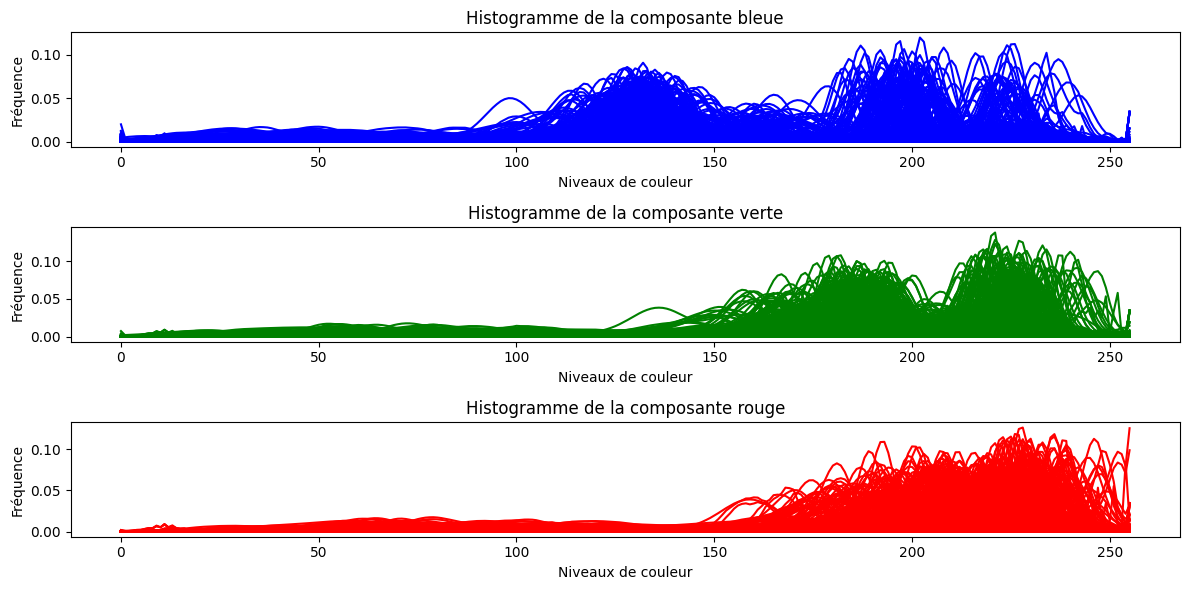

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin vers le dossier contenant les images
images_folder = "/content/drive/MyDrive/Images"

# Initialiser les listes pour stocker les histogrammes de couleurs
histogram_blue = []
histogram_green = []
histogram_red = []

# Parcourir tous les fichiers dans le dossier d'images
for filename in os.listdir(images_folder):
    if filename.endswith((".jpg", ".png")):
        image_path = os.path.join(images_folder, filename)

        # Charger l'image
        image = cv2.imread(image_path)

        # Calculer l'histogramme de couleurs
        hist_blue = cv2.calcHist([image], [0], None, [256], [0, 256])
        hist_green = cv2.calcHist([image], [1], None, [256], [0, 256])
        hist_red = cv2.calcHist([image], [2], None, [256], [0, 256])

        # Normaliser les histogrammes (facultatif)
        hist_blue = hist_blue / hist_blue.sum()
        hist_green = hist_green / hist_green.sum()
        hist_red = hist_red / hist_red.sum()

        # Ajouter les histogrammes à la liste
        histogram_blue.append(hist_blue.ravel())
        histogram_green.append(hist_green.ravel())
        histogram_red.append(hist_red.ravel())

# Convertir les listes en un tableau numpy
histogram_blue = np.array(histogram_blue)
histogram_green = np.array(histogram_green)
histogram_red = np.array(histogram_red)

# Créer un histogramme cumulatif (facultatif)
cumulative_histogram_blue = np.cumsum(histogram_blue, axis=0)
cumulative_histogram_green = np.cumsum(histogram_green, axis=0)
cumulative_histogram_red = np.cumsum(histogram_red, axis=0)

# Afficher les histogrammes
plt.figure(figsize=(12, 6))

# Afficher l'histogramme bleu
plt.subplot(3, 1, 1)
plt.plot(histogram_blue.T, color='blue')  # Transposer pour avoir les niveaux de couleur en abscisse
plt.title('Histogramme de la composante bleue')
plt.xlabel('Niveaux de couleur')
plt.ylabel('Fréquence')

# Afficher l'histogramme vert
plt.subplot(3, 1, 2)
plt.plot(histogram_green.T, color='green')
plt.title('Histogramme de la composante verte')
plt.xlabel('Niveaux de couleur')
plt.ylabel('Fréquence')

# Afficher l'histogramme rouge
plt.subplot(3, 1, 3)
plt.plot(histogram_red.T, color='red')
plt.title('Histogramme de la composante rouge')
plt.xlabel('Niveaux de couleur')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()